# 지점별 주문수 예측 회귀분석

In [2]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 준비 및 탐색

In [3]:
import numpy as np   
import pandas as pd  

data_df = pd.read_csv('YogiyoTip.csv',encoding = 'cp949', header=0, engine='python')

In [4]:
print('데이터셋 크기 : ', data_df.shape)

data_df = data_df.drop_duplicates()
print('중복행 제거 후 크기: ', data_df.shape)

data_df.head()

데이터셋 크기 :  (1941, 7)
중복행 제거 후 크기:  (1877, 7)


,가게명,판매업종,배달소요시간,평점,리뷰수,배달기준금액,배달비
0,BHC-미아점,2,60,4.9,11109,16000,3000
1,호식이두마리치킨-길음점,2,50,4.9,3999,14000,3000
2,굽네치킨&피자-미아1호점,2,60,4.6,1135,15000,3000
3,네네치킨-정릉점,2,49,4.6,1622,16000,3000
4,짱닭치킨-성신여대점,2,58,4.9,421,14000,2000


#### - 분석하지 않을 변수 제외하기

In [5]:
data_df = data_df.drop(['가게명'], axis=1, inplace=False)

In [6]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

 데이터세트 크기 :  (1877, 6)


,판매업종,배달소요시간,평점,리뷰수,배달기준금액,배달비
0,2,60,4.9,11109,16000,3000
1,2,50,4.9,3999,14000,3000
2,2,60,4.6,1135,15000,3000
3,2,49,4.6,1622,16000,3000
4,2,58,4.9,421,14000,2000


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1940
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   판매업종    1877 non-null   int64  
 1   배달소요시간  1877 non-null   int64  
 2   평점      1877 non-null   float64
 3   리뷰수     1877 non-null   int64  
 4   배달기준금액  1877 non-null   int64  
 5   배달비     1877 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 102.6 KB


## 3) 분석 모델 구축

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# X, Y 분할하기

Y = data_df['리뷰수']
X = data_df.drop(['리뷰수'], axis=1, inplace=False)

In [10]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [12]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [14]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 1281738.815, RMSE : 1132.139
R^2(Variance score) : 0.047


In [15]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -421.28
회귀 계수 값:  [ 1.0130e+01  9.8500e+00  1.2594e+02  1.0000e-02 -5.0000e-02]


In [16]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

평점        125.94
판매업종       10.13
배달소요시간      9.85
배달기준금액      0.01
배달비        -0.05
dtype: float64

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

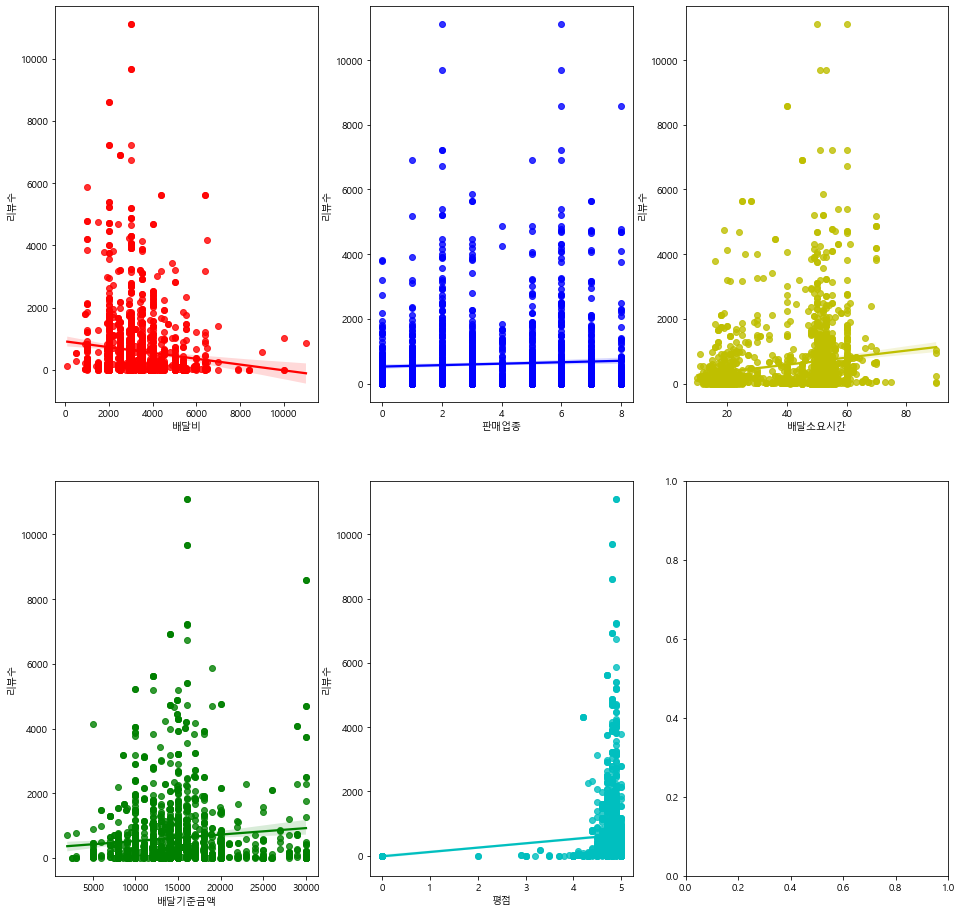

In [18]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['배달비','판매업종', '배달소요시간', '배달기준금액',  '평점']
plot_color = ['r', 'b', 'y', 'g', 'c']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='리뷰수', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 주문수 예측하기  >>>>

In [230]:
print("주문수를 예측하고 싶은 지점의 정보를 입력해주세요.")

category = int(input("판매업종 : "))
delivery_time = int(input("배달소요시간 : "))
grade = float(input("평점 : "))
deliverybasecost = int(input("배달기준금액 : "))
cost = int(input("배달비 : "))

주문수를 예측하고 싶은 지점의 정보를 입력해주세요.
판매업종 : 2
배달소요시간 : 50
평점 : 4.8
배달기준금액 : 14000
배달비 : 3000


In [231]:
order_predict = lr.predict([[category, delivery_time, grade, deliverybasecost, cost]])

In [232]:
print("이 지점의 예상 주문수는 %.2f 입니다." % order_predict)

이 지점의 예상 주문수는 689.08 입니다.
